## 1. Importing Dependencies

In [1]:
import numpy as np
import matplotlib.pyplot as plt

## 2. Managing Dataset

In [2]:
# Creating data set

A =[0, 0, 1, 1, 0, 0,
0, 1, 0, 0, 1, 0,
1, 1, 1, 1, 1, 1,
1, 0, 0, 0, 0, 1,
1, 0, 0, 0, 0, 1]


B =[0, 1, 1, 1, 1, 0,
0, 1, 0, 0, 1, 0,
0, 1, 1, 1, 1, 0,
0, 1, 0, 0, 1, 0,
0, 1, 1, 1, 1, 0]


C =[0, 1, 1, 1, 1, 0,
0, 1, 0, 0, 0, 0,
0, 1, 0, 0, 0, 0,
0, 1, 0, 0, 0, 0,
0, 1, 1, 1, 1, 0]

D = [0, 1, 1, 1, 0, 0,
 0, 1, 0, 1, 0, 0,
 0, 1, 0, 1, 0, 0, 
 0, 1, 0, 1, 0, 0,
 0, 1, 1, 1, 0, 0]

E = [0, 1, 1, 1, 1, 0,
 0, 1, 0, 0, 0, 0,
 0, 1, 1, 1, 0, 0,
 0, 1, 0, 0, 0, 0,
 0, 1, 1, 1, 1, 0]

F = [0, 1, 1, 1, 1, 0,
 0, 1, 0, 0, 0, 0,
 0, 1, 1, 1, 0, 0,
 0, 1, 0, 0, 0, 0,
 0, 1, 0, 0, 0, 0]

G = [0, 1, 1, 1, 1, 0,
 0, 1, 0, 0, 0, 0,
 0, 1, 0, 1, 1, 0,
 0, 1, 0, 0, 1, 0,
 0, 1, 1, 1, 1, 0]

H = [0, 1, 0, 1, 0, 0,
 0, 1, 0, 1, 0, 0,
 0, 1, 1, 1, 0, 0,
 0, 1, 0, 1, 0, 0, 
 0, 1, 0, 1, 0, 0]

I = [0, 1, 1, 1, 0, 0,
 0, 0, 1, 0, 0, 0,
 0, 0, 1, 0, 0, 0,
 0, 0, 1, 0, 0, 0, 
 0, 1, 1, 1, 0, 0]

J = [0, 1, 1, 1, 1, 0,
 0, 0, 0, 1, 0, 0,
 0, 0, 0, 1, 0, 0, 
 0, 1, 0, 1, 0, 0,
 0, 1, 1, 1, 0, 0]

# Creating labels
y =[[1, 0, 0, 0, 0, 0, 0, 0, 0, 0],
[0, 1, 0, 0, 0, 0, 0, 0, 0, 0],
[0, 0, 1, 0, 0, 0, 0, 0, 0, 0],
[0, 0, 0, 1, 0, 0, 0, 0, 0, 0],
[0, 0, 0, 0, 1, 0, 0, 0, 0, 0],
[0, 0, 0, 0, 0, 1, 0, 0, 0, 0],   
[0, 0, 0, 0, 0, 0, 1, 0, 0, 0],
[0, 0, 0, 0, 0, 0, 0, 1, 0, 0],
[0, 0, 0, 0, 0, 0, 0, 0, 1, 0],
[0, 0, 0, 0, 0, 0, 0, 0, 0, 1]]


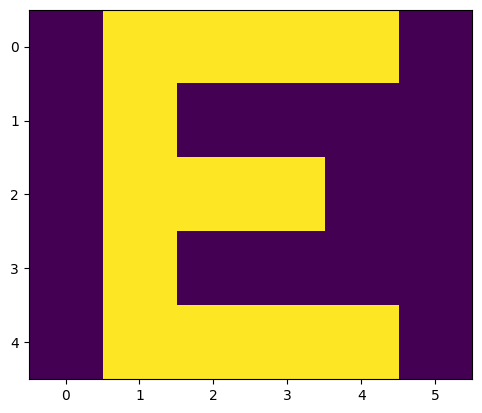

In [3]:
plt.imshow(np.array(E).reshape(5, 6))
plt.show();

In [4]:
# reshaping and arranging dataset
X = [np.array(A).reshape(1,30), 
    np.array(B).reshape(1,30),
    np.array(C).reshape(1,30),
    np.array(D).reshape(1,30),
    np.array(E).reshape(1,30),
    np.array(F).reshape(1,30),
    np.array(G).reshape(1,30),
    np.array(H).reshape(1,30),
    np.array(I).reshape(1,30),
    np.array(J).reshape(1,30)]

y = np.array(y)

## 3. Functions for Building Neural Network

In [5]:
# activation function
def sigmoid(x):
    return(1/(1+np.exp(-x)))

# feed forward neural network
def forward(x, w1, w2):
    # hidden layer
    z1 = x.dot(w1) # input from layer 1
    a1 = sigmoid(z1) # output of layer 2
     
    # Output layer
    z2 = a1.dot(w2)# input of output layer
    a2 = sigmoid(z2)# output of output layer
    return a2

# initializing weights
def weights(x, y):
    l =[]
    for i in range(x * y):
        l.append(np.random.randn())
    return(np.array(l).reshape(x, y))

# defining loss using Mean-squares error
def loss(out, y):
    s =(np.square(out-y))
    s = np.sum(s)/len(y)
    return(s)

# Back propagation of error
def back_prop(x, y, w1, w2, alpha):
     
    # hidden layer
    z1 = x.dot(w1)# input from layer 1
    a1 = sigmoid(z1)# output of layer 2
     
    # Output layer
    z2 = a1.dot(w2)# input of out layer
    a2 = sigmoid(z2)# output of out layer
    
    # error in output layer
    d2 =(a2-y)
    d1 = np.multiply((w2.dot((d2.transpose()))).transpose(),
                                   (np.multiply(a1, 1-a1)))
    # Gradient for w1 and w2
    w1_adj = x.transpose().dot(d1)
    w2_adj = a1.transpose().dot(d2)
     
    # Updating parameters
    w1 = w1-(alpha*(w1_adj))
    w2 = w2-(alpha*(w2_adj))
     
    return(w1, w2)


## 4. Train and Predict Function

In [6]:
def train(x, y, w1, w2, alpha = 0.01, epoch = 10):
    acc =[]
    losss =[]
    for j in range(epoch):
        l =[]
        for i in range(len(x)):
            out = forward(x[i], w1, w2)
            l.append((loss(out, y[i])))
            w1, w2 = back_prop(x[i], y[i], w1, w2, alpha)
        print("epochs:", j + 1, "======== acc:", (1-(sum(l)/len(x)))*100)  
        acc.append((1-(sum(l)/len(x)))*100)
        losss.append(sum(l)/len(x))
    return(acc, losss, w1, w2)

def predict(x, w1, w2):
    Out = forward(x, w1, w2)
    plt.imshow(x.reshape(5, 6))
    plt.show()  

In [7]:
# initializing random weights
w1 = weights(30, 5)  # input to hidden layer weights with 30 inputs and 5 hidden units
w2 = weights(5, 10)  # hidden to output layer weights with 5 hidden units and 10 output labels

print(w1, "\n\n", w2)

[[ 0.18604626 -0.58509194 -0.12397639 -0.98454413 -0.66730089]
 [-1.02404031 -1.84923661 -0.35558659 -0.06709083 -1.70110852]
 [-1.07747063 -0.83303495  1.03543211  0.97444469  0.88158751]
 [-0.91337259 -0.78194775  0.4742438   1.57168333  1.29952157]
 [ 1.06566399 -0.78813822  0.84797711 -1.37626882  2.52548651]
 [-0.18655742  0.35933228  1.45536037  1.06886629  0.18380963]
 [-0.36127695  0.25682927 -0.81192161  1.78064501 -0.00824843]
 [ 0.48895376 -0.66145943  0.2627629  -0.73280836 -1.80204464]
 [-1.34830958 -0.80039653  0.41872844  0.30450435 -0.11860102]
 [ 1.5057354   0.26276702  1.90074557  0.02130597  1.60704466]
 [ 1.44827793 -0.83642423  0.56563705  0.48910499 -1.37295391]
 [-1.49097061  0.22386989  0.4927302  -0.55837459  0.82547561]
 [-0.5427121  -0.9678046  -0.23179153  0.8205199  -0.95473048]
 [-0.51843383 -1.14125667  0.50622691 -0.34126867 -0.87800046]
 [ 0.04337228  2.12261832 -2.16813747 -2.7424472   0.7028495 ]
 [-0.24775959 -0.39624035  1.47199166  0.4033015   1.63

In [8]:
# training the model
acc, losss, w1, w2 = train(X, y, w1, w2, 0.1, 100)

epochs: 1 ======== acc: 82.55043954594568
epochs: 2 ======== acc: 87.42513593098518
epochs: 3 ======== acc: 89.42582865415207
epochs: 4 ======== acc: 90.21397315413515
epochs: 5 ======== acc: 90.56099491813886
epochs: 6 ======== acc: 90.74556012927545
epochs: 7 ======== acc: 90.86337994583104
epochs: 8 ======== acc: 90.95045819929317
epochs: 9 ======== acc: 91.0218053329301
epochs: 10 ======== acc: 91.08412954798297
epochs: 11 ======== acc: 91.1406031252018
epochs: 12 ======== acc: 91.19284272932468
epochs: 13 ======== acc: 91.24177288392765
epochs: 14 ======== acc: 91.28800137464815
epochs: 15 ======== acc: 91.33197700854996
epochs: 16 ======== acc: 91.37405478981263
epochs: 17 ======== acc: 91.41452484268378
epochs: 18 ======== acc: 91.4536280881473
epochs: 19 ======== acc: 91.49156699995363
epochs: 20 ======== acc: 91.52851411567427
epochs: 21 ======== acc: 91.56461908441597
epochs: 22 ======== acc: 91.60001450657731
epochs: 23 ======== acc: 91.63482073563638
epochs: 24 ======== acc

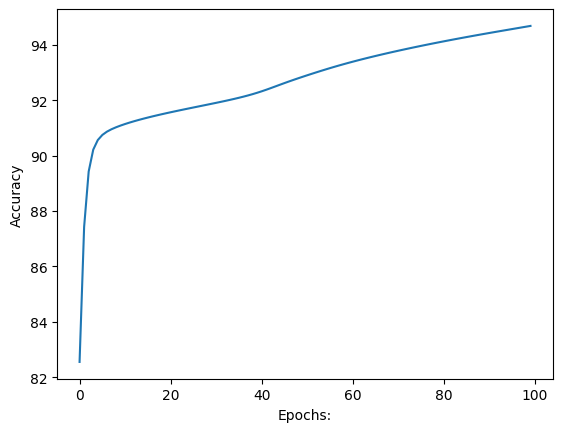

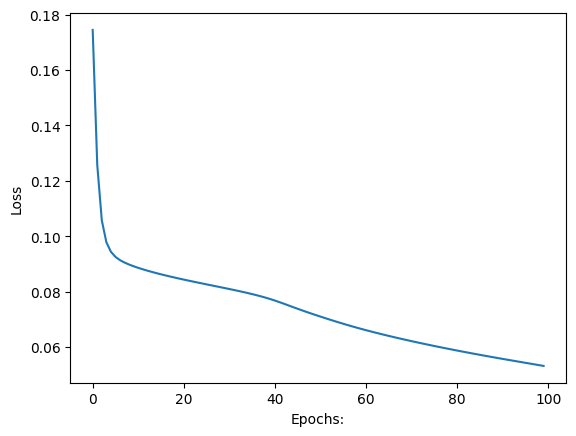

In [9]:
# ploting accuracy
plt.plot(acc)
plt.ylabel('Accuracy')
plt.xlabel("Epochs:")
plt.show()
 
# plotting Loss
plt.plot(losss)
plt.ylabel('Loss')
plt.xlabel("Epochs:")
plt.show()

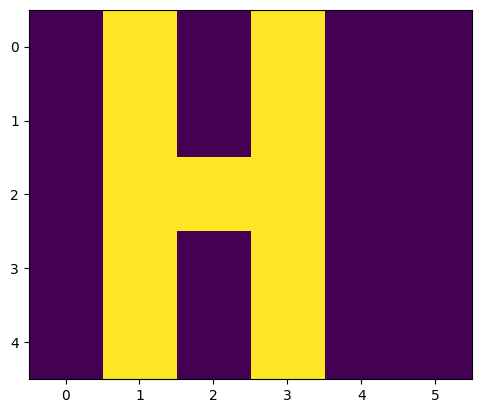

In [10]:
predict(X[7], w1, w2)